# Kuairec dataset

In [48]:
# Change this line to read from desired file

In [1]:
cd "~/documents/KuaiRec 2.0"

/home/gerardoduran/documents/KuaiRec 2.0


/home/gerardoduran/miniconda3/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/gerardoduran/miniconda3/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [4]:
sns.set_palette("colorblind")
plt.rcParams["figure.figsize"] = (7.2, 4.2)

In [5]:
%config InlineBackend.figure_format = "retina"

In [6]:
small_matrix = pd.read_csv("data/small_matrix.csv")
small_matrix.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


<Axes: xlabel='watch_ratio', ylabel='Count'>

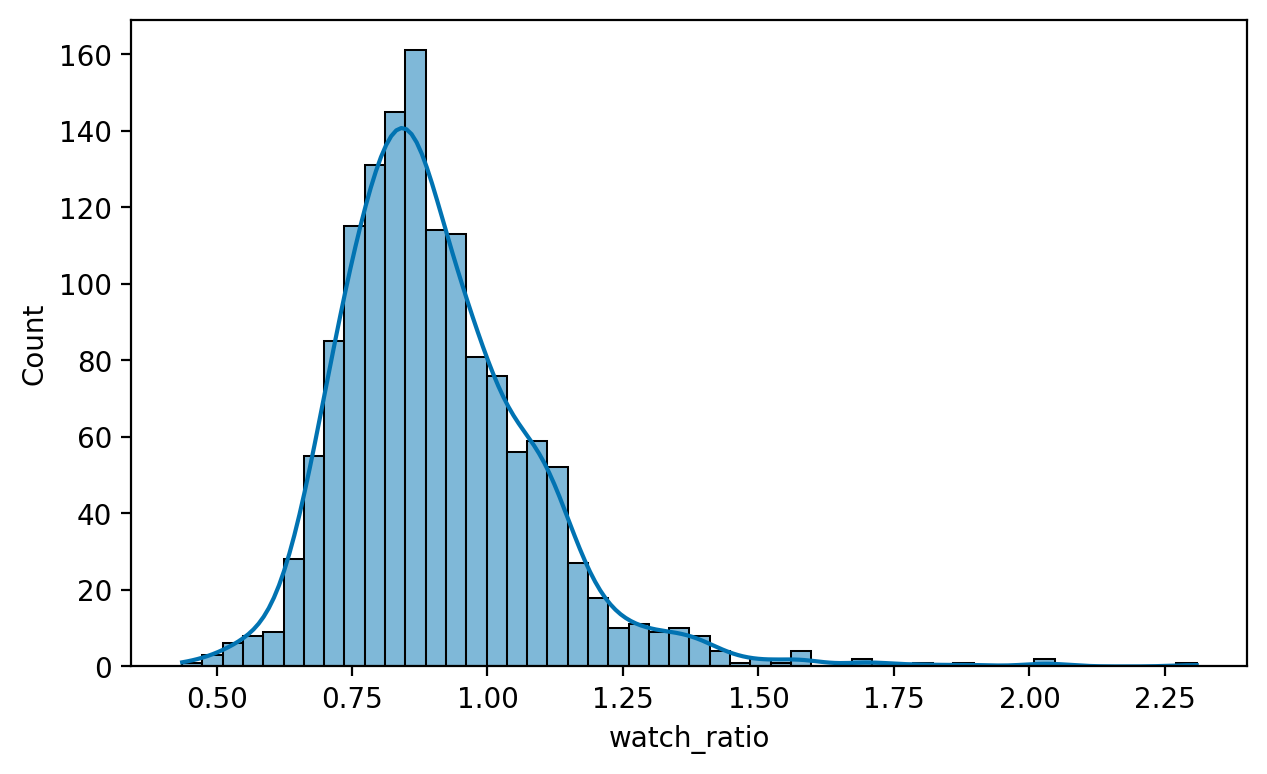

In [7]:
sns.histplot(small_matrix.groupby("user_id")["watch_ratio"].mean(), kde=True)

In [8]:
small_matrix.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


<Axes: xlabel='video_id', ylabel='user_id'>

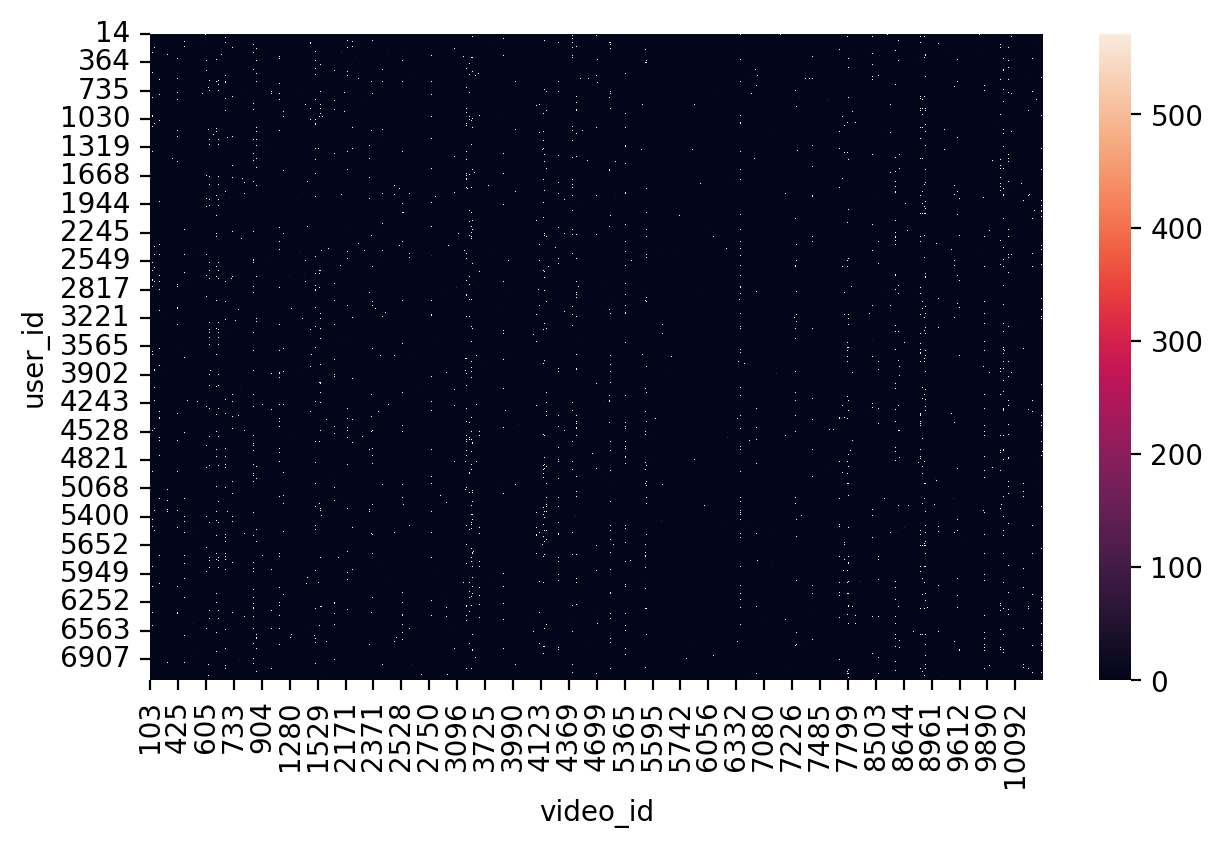

In [9]:
sns.heatmap(
    small_matrix
    .pivot_table(index="user_id", columns="video_id", values="watch_ratio")
)

In [13]:
small_matrix["user_id"].unique()

array([  14,   19,   21, ..., 7153, 7159, 7162])

In [16]:
%%time
small_matrix_sub = small_matrix.dropna(subset="date")
small_matrix_sub = small_matrix_sub.assign(time=pd.to_datetime(small_matrix_sub["time"]))
# small_matrix_sub = small_matrix_sub

CPU times: user 1.32 s, sys: 114 ms, total: 1.44 s
Wall time: 1.43 s


In [35]:
daily_wr = small_matrix_sub.set_index("time").resample("D")["watch_ratio"].mean()

In [36]:
users = small_matrix_sub["user_id"].unique()

In [37]:
daily_wr = small_matrix_sub.pivot_table(index="date", columns="user_id", values="watch_ratio")
daily_wr.index = pd.to_datetime(daily_wr.index.astype(int).astype(str), yearfirst=format("%Y%m%d"))

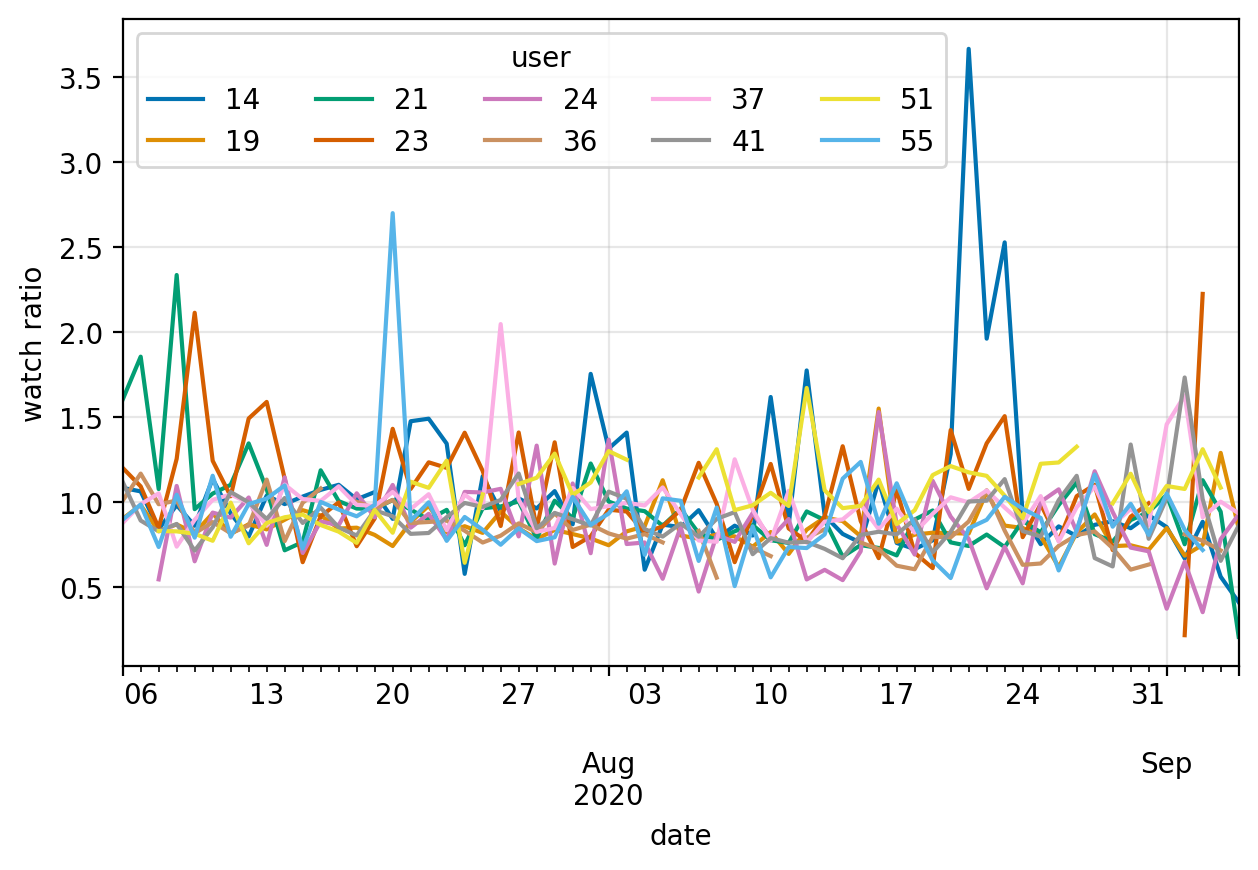

In [40]:
daily_wr.iloc[:, :10].plot()
plt.legend(ncol=5, title="user")
plt.ylabel("watch ratio")
plt.grid(alpha=0.3)

In [41]:
%%time
n_videos = 5

df_all = []
for user in tqdm(users):
    subset = small_matrix_sub.query("user_id == @user")
    n_values = len(subset)
    subset = subset.assign(group=np.arange(n_values) // n_videos)
    
    df_flat = subset.groupby("group").apply(lambda x: x.values.flatten(), include_groups=False).apply(pd.Series)
    df_flat.columns = [f"{col}_{i}" for i in range(n_videos) for col in subset.columns[:-1]]
    df_all.append(df_flat)
df_all = pd.concat(df_all, axis=0)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1411/1411 [02:39<00:00,  8.86it/s]


CPU times: user 2min 53s, sys: 1.83 s, total: 2min 55s
Wall time: 2min 39s


In [51]:
df_all.head()

,user_id_0,video_id_0,play_duration_0,video_duration_0,time_0,date_0,timestamp_0,watch_ratio_0,user_id_1,video_id_1,...,timestamp_3,watch_ratio_3,user_id_4,video_id_4,play_duration_4,video_duration_4,time_4,date_4,timestamp_4,watch_ratio_4
group,,,,,,,,,,,,,,,,,,,,,
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103,14.0,183.0,...,1.593898e+09,0.566388,14.0,8234.0,4602.0,11000.0,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
1,14,6789,8607,13267,2020-07-05 05:36:00.773,20200705.0,1.593899e+09,0.648753,14.0,1963.0,...,1.593899e+09,0.617838,14.0,171.0,8518.0,5217.0,2020-07-05 05:57:26.581,20200705.0,1.593900e+09,1.632739
2,14,6803,8614,6334,2020-07-05 06:14:51.500,20200705.0,1.593901e+09,1.359962,14.0,3634.0,...,1.593902e+09,2.241500,14.0,179.0,8642.0,6067.0,2020-07-05 06:51:24.362,20200705.0,1.593903e+09,1.424427
3,14,5266,8710,7074,2020-07-05 06:52:26.169,20200705.0,1.593903e+09,1.231269,14.0,5241.0,...,1.593907e+09,0.787826,14.0,8220.0,8543.0,5734.0,2020-07-05 08:18:08.954,20200705.0,1.593908e+09,1.489885
4,14,6801,4588,6933,2020-07-05 08:22:10.226,20200705.0,1.593909e+09,0.661763,14.0,3647.0,...,1.593911e+09,1.418523,14.0,186.0,4453.0,6850.0,2020-07-05 09:08:13.209,20200705.0,1.593911e+09,0.650073


In [50]:
df_all.to_pickle(f"./data/arms_{n_videos:02}_raw.pkl")

## A simple bandit

In [10]:
df_all = pd.read_pickle("./data/arms_05_raw.pkl").dropna()

In [11]:
import jax
import chex
import jax.numpy as jnp

In [249]:
@chex.dataclass
class Bandit:
    pulls: jax.Array
    values: jax.Array
    eps: float
    alpha: float

    def update(self, arm, reward):
        current_value = self.values[arm]
        current_pulls = self.pulls[arm]

        value_update = self.alpha * reward + (1 - self.alpha) * current_value
        
        values_update = self.values.at[arm].set(value_update)
        pulls_update = self.pulls.at[arm].set(current_pulls + 1)

        return self.replace(
            pulls=pulls_update,
            values=values_update
        )

    
    def pick(self, key, x):
        key_arm, key_eps = jax.random.split(key)
        greedy_choice = self.values[x].argmax()

        is_random = jax.random.bernoulli(key_arm, self.eps)
        random_choice = jax.random.choice(key_eps, len(x)).astype(int)

        arm_choice = greedy_choice * (1 - is_random) + random_choice * is_random
        return arm_choice
        
    
    @classmethod
    def init(cls, n_arms, eps, alpha):
        key = jax.random.PRNGKey(1314)
        # TODO: change for zeros
        values = jnp.zeros(n_arms)
        return Bandit(
            pulls=jnp.zeros(n_arms),
            values=values,
            eps=eps,
            alpha=alpha
        )

In [252]:
class ENV:
    def __init__(self):
        ...

    def pull_and_update(self, key, bel, y, x):
        ixmax = bel.pick(key, x)
        reward = y[ixmax]

        bel = bel.update(x[ixmax], reward)
        return bel, reward

    def scan(self, key, bel, Y, X):
        keys = jax.random.split(key, len(X))
        def _step(bel, xs):
            key, y, x = xs
            bel, reward = self.pull_and_update(key, bel, y, x)
            return bel, reward

        XS = (keys, Y, X)
        bel, rewards = jax.lax.scan(_step, bel, XS)
        return bel, rewards

In [253]:
# We start by building a bandit problem where we are only given the possible arms to pull and the (latent) rewards
X = df_all[[c for c in df_all if "video_id" in c]].astype(int).values
Y = df_all[[c for c in df_all if "watch_ratio" in c]].astype(float).values

X, Y = jax.tree.map(jnp.array, (X, Y))

In [254]:
n_arms = len(small_matrix_sub["video_id"].unique())
bandit_map = Bandit(pulls=0, values=0, eps=None, alpha=None)

### Random bandit

In [255]:
key = jax.random.PRNGKey(314)
env = ENV()

In [281]:
%%time
bandit = Bandit.init(n_arms=n_arms, eps=1.0, alpha=0.3)
bel_random, rewards_random = env.scan(key, bandit, Y[:100_000], X[:100_000])
rewards_random = np.array(rewards_random)

CPU times: user 1.33 s, sys: 14.6 ms, total: 1.35 s
Wall time: 6.36 s


### Epsilon bandit

In [282]:
bandit = Bandit.init(n_arms=n_arms, eps=0.01, alpha=0.3)
bel_eps, rewards_eps = env.scan(key, bandit, Y[:100_000], X[:100_000])
rewards_eps = np.array(rewards_eps)

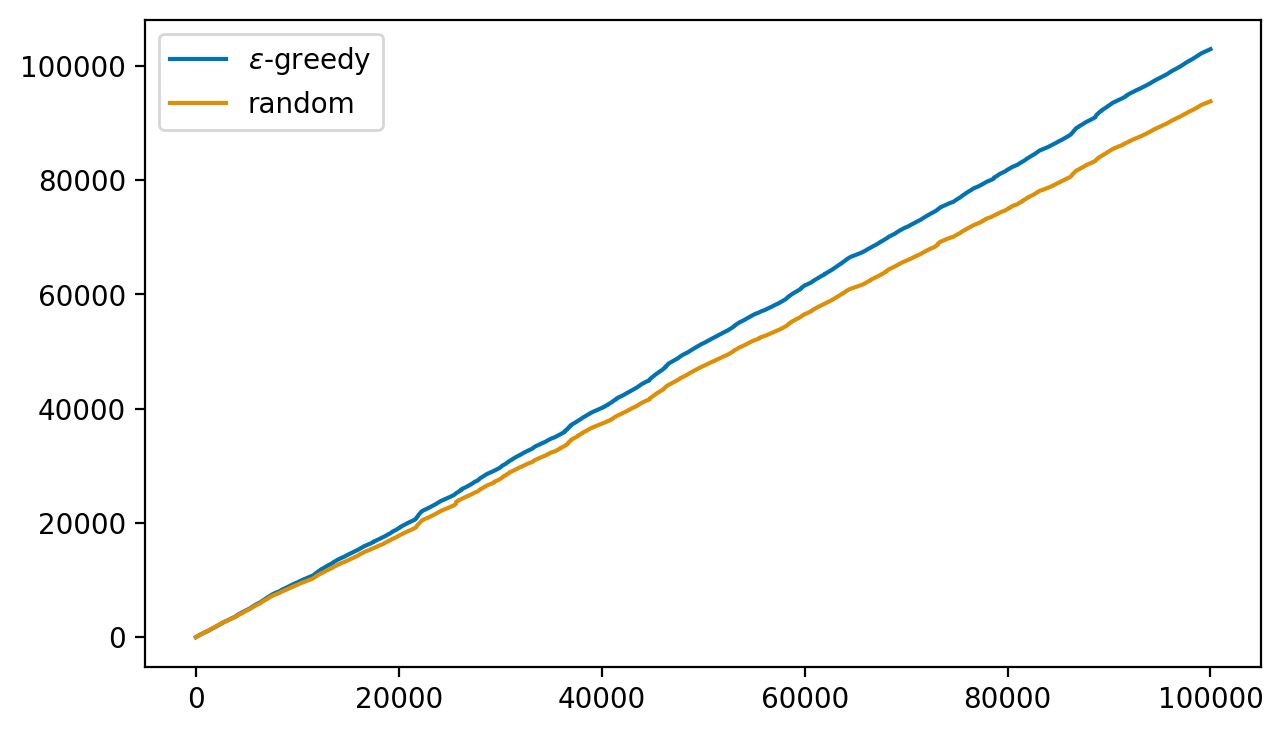

In [283]:
plt.plot(rewards_eps.cumsum(), label=r"$\epsilon$-greedy")
plt.plot(rewards_random.cumsum(), label="random")
plt.legend()

Text(0.5, 1.0, 'Outperformance over random')

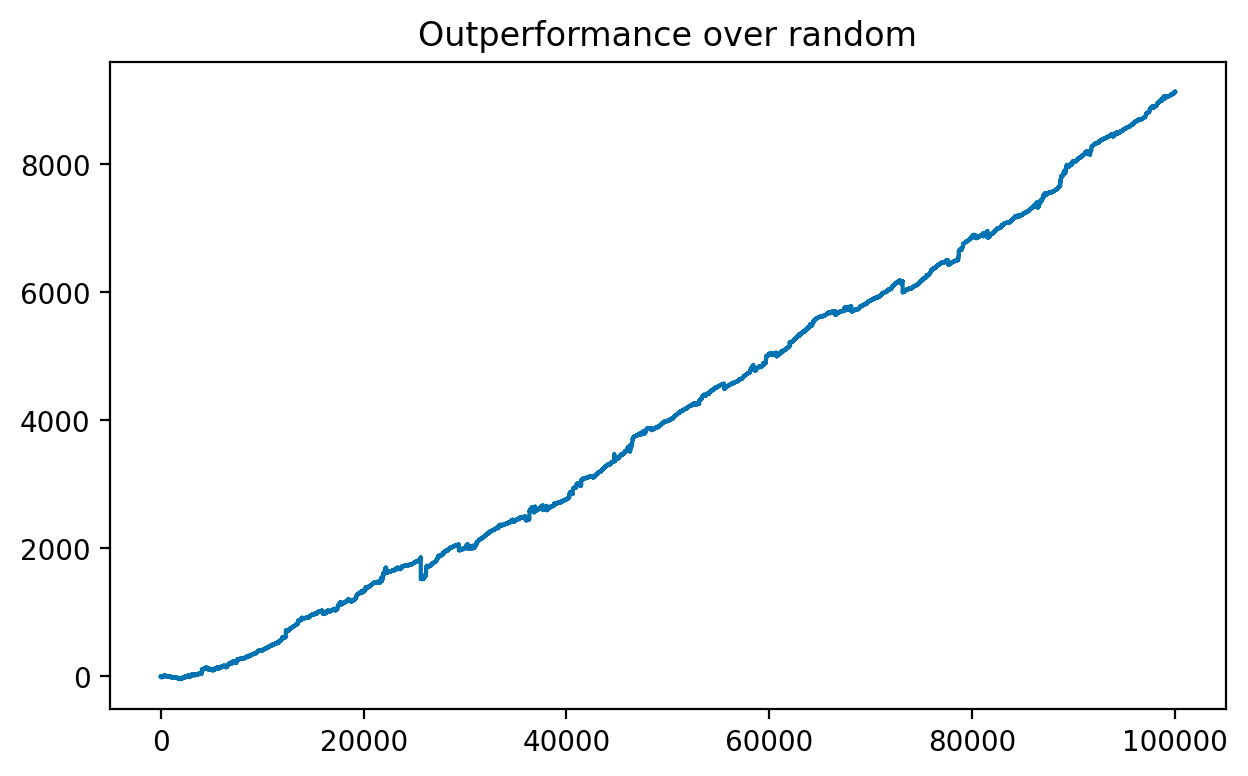

In [285]:
plt.plot((rewards_eps - rewards_random).cumsum())
plt.title("Outperformance over random")